In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import matplotlib.cm as cm
from sklearn.preprocessing import MinMaxScaler
import statistics as s
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

#getting the data set
data=pd.read_csv('brain_stroke.csv',index_col=0)
data.head(-5)
#print(data)

#checking the missing rows
#print(data.isna().sum())
#checking the type of each rows
#data.info()



# Importing LabelEncoder
from sklearn.preprocessing import LabelEncoder
# Instantiating LabelEncoder
le=LabelEncoder()
# Iterating over all the values of each column and extract their dtypes
for col in data.columns.to_numpy():
    # Comparing if the dtype is object
    if data[col].dtypes in ('object','category'):
    # Using LabelEncoder to do the numeric transformation
        data[col]=le.fit_transform(data[col].astype(str))

#establishing the training set and the test set
x=data.drop(["stroke"],axis=1)
y=data["stroke"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42,stratify=y)
x_train.shape, x_test.shape


# Saving the feature names 
features = x.columns.tolist()

import time
startTime = time.time()
##Decision tree
dt=DecisionTreeClassifier(max_depth=5,random_state=42,criterion="gini",splitter="best",min_samples_split=10,max_leaf_nodes=15)
dt.fit(x_train,y_train)


# Extracting the importances by sklearn 
importances_sk = dt.feature_importances_
feature_importance_sk = {}
for i, feature in enumerate(features):
    feature_importance_sk[feature] = round(importances_sk[i], 3)
    
print(f"Feature importance by sklearn: {feature_importance_sk}")



#Evaluate the accuracy of the model
y_pred = dt.predict(x_test)
predictions = metrics.accuracy_score(y_test, y_pred)
#Calculating the accuracy in percentage
print('The accuracy is: ', predictions * 100, '%')
executionTime = (time.time() - startTime)
print('Execution time in seconds: ' + str(executionTime))

Feature importance by sklearn: {'age': 0.538, 'hypertension': 0.0, 'heart_disease': 0.075, 'ever_married': 0.022, 'work_type': 0.0, 'Residence_type': 0.0, 'avg_glucose_level': 0.164, 'bmi': 0.172, 'smoking_status': 0.03}
The accuracy is:  94.24749163879599 %
Execution time in seconds: 0.007001399993896484


In [27]:
#creating reduced vectors
x=data.drop(columns=['stroke', 'hypertension','work_type','Residence_type','ever_married','smoking_status'])
y=data["stroke"]
print(x)

#scaling
scaler = MinMaxScaler()
X= scaler.fit_transform(x)

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)
x_train.shape, x_test.shape



         age  heart_disease  avg_glucose_level   bmi
gender                                              
Male    67.0              1             228.69  36.6
Male    80.0              1             105.92  32.5
Female  49.0              0             171.23  34.4
Female  79.0              0             174.12  24.0
Male    81.0              0             186.21  29.0
...      ...            ...                ...   ...
Male    41.0              0              70.15  29.8
Male    40.0              0             191.15  31.1
Female  45.0              0              95.02  31.8
Male    40.0              0              83.94  30.0
Female  80.0              0              83.75  29.1

[4981 rows x 4 columns]


((3486, 4), (1495, 4))

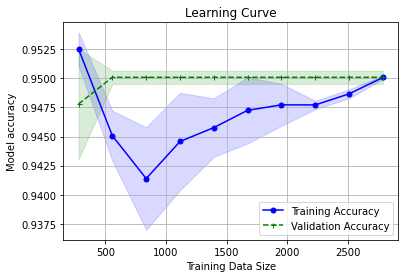

Training set score: 0.228669
Training set loss: 0.159276
The accuracy is:  95.05016722408027 %
Execution time in seconds: 0.35047435760498047


C:\Users\Batuhan\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


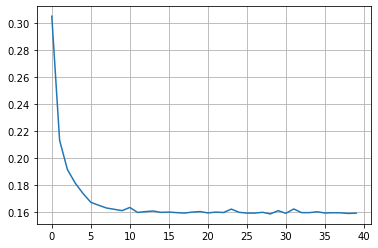

In [28]:
#learning curve
train_size, train_score2, test_score2=learning_curve(MLPClassifier(activation='relu',random_state=42,max_iter=1000,learning_rate_init=0.01, hidden_layer_sizes=(100,)), x_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), scoring="accuracy",cv=5)
train_mean = np.mean(train_score2, axis=1)
test_mean = np.mean(test_score2, axis=1)
train_std = np.std(train_score2, axis=1)
test_std = np.std(test_score2, axis=1)
plt.plot(train_size, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_size, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_size, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_size, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

##Neural Network
import time
startTime = time.time()
dt = MLPClassifier(activation='relu',learning_rate='adaptive',random_state=42,max_iter=1000,learning_rate_init=0.01, hidden_layer_sizes=100).fit(x_train, y_train)
print("Training set score: %f" % dt.score(x, y))
print("Training set loss: %f" % dt.loss_)
plt.plot(dt.loss_curve_)
plt.grid()

#Evaluate the accuracy of the model
y_pred = dt.predict(x_test)
predictions = metrics.accuracy_score(y_test, y_pred)
#Calculating the accuracy in percentage
print('The accuracy is: ', predictions * 100, '%')
executionTime = (time.time() - startTime)
print('Execution time in seconds: ' + str(executionTime))